In [1]:
from PIL import Image
from numpy import array, argwhere, arange
from sklearn.cluster import mean_shift
from matplotlib.pyplot import figure

In [146]:
img = Image.open("./inf.jpg")

In [147]:
arr = array(img.convert('L')).T[:,::-1]

In [148]:
indices = argwhere(arr < 100)

In [149]:
points, labels = mean_shift(indices, bandwidth=5.5)

In [150]:
len(points)

88

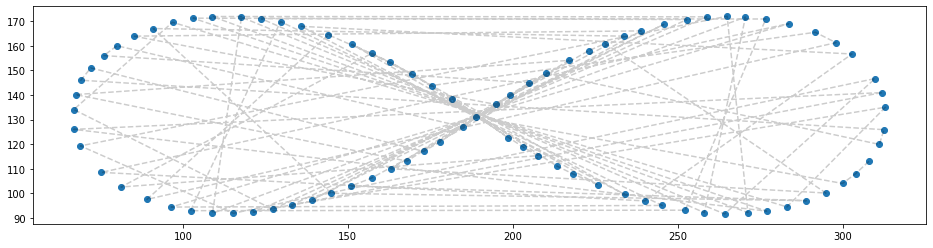

In [162]:
fig = figure(figsize=(16, 4))
ax = fig.gca()
ax.plot(points[:,0], points[:,1], "o")
ax.plot(points[:,0], points[:,1], "--k", alpha=0.2)

In [152]:
def distance(P1, P2):
    """
    This function computes the distance between 2 points defined by
     P1 = (x1,y1) and P2 = (x2,y2) 
    """
    return ((P1[0] - P2[0])**2 + (P1[1] - P2[1])**2) ** 0.5

In [153]:
def optimized_path(coords, start=None):
    """
    This function finds the nearest point to a point
    coords should be a list in this format coords = [ [x1, y1], [x2, y2] , ...] 

    """
    if start is None:
        start = coords[0]
    pass_by = coords
    path = [start]
    pass_by.remove(start)
    while pass_by:
        nearest = min(pass_by, key=lambda x: distance(path[-1], x))
        path.append(nearest)
        pass_by.remove(nearest)
    return path

In [154]:
# define a start point
#start = [449.8636363636364, 540.5]
start = points[0].tolist()
path = optimized_path(points.tolist(), start)

In [155]:
xs, ys = (array(path).T)*1.5

In [156]:
xs = xs - min(xs)
ys = ys - min(ys)

In [157]:
def medio(qs):
    return (max(qs) - min(qs))/2

In [158]:
#xs = xs - medio(xs)
#ys = ys - medio(ys)

(0.0, 120.5909090909091)

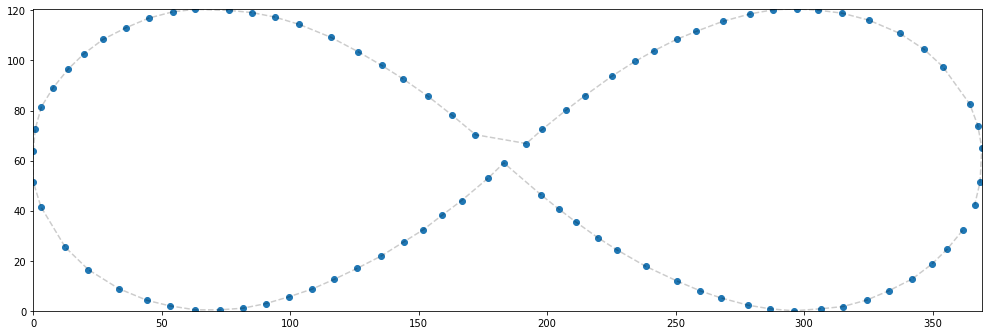

In [159]:
fig = figure(figsize=(17, max(ys)/max(xs)*17))
ax = fig.gca()
ax.plot(xs, ys, "o")
ax.plot(xs, ys, "--k", alpha=0.2)
ax.set_xlim(min(xs), max(xs))
ax.set_ylim(min(ys), max(ys))

In [160]:
from numpy import matrix, pi

def rot_x(θ):
    from numpy import sin, cos, matrix
    
    A = matrix([[1, 0, 0, 0],
                [0, cos(θ), -sin(θ), 0],
                [0, sin(θ), cos(θ), 0],
                [0, 0, 0, 1]])
    return A

def rot_y(θ):
    from numpy import sin, cos, matrix
    
    A = matrix([[cos(θ), 0, sin(θ), 0],
                [0, 1, 0, 0],
                [-sin(θ), 0, cos(θ), 0],
                [0, 0, 0, 1]])
    return A

def rot_z(θ):
    from numpy import sin, cos, matrix
    
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_z(z):
    from numpy import sin, cos, matrix
    
    A = matrix([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, z],
                [0, 0, 0, 1]])
    return A

def tras_y(y):
    from numpy import sin, cos, matrix
    
    A = matrix([[1, 0, 0, 0],
                [0, 1, 0, y],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_x(x):
    from numpy import sin, cos, matrix
    
    A = matrix([[1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

In [119]:
puntos = [[x,y] for x,y in zip(xs, ys)]
vectores = [matrix(punto + [0, 1]).T for punto in puntos]
trans = tras_x(500)*tras_z(712)*rot_z(pi/2)*rot_x(pi/2)
vec_trans = [trans*vector for vector in vectores]

In [120]:
xs, ys, zs = matrix([vector[:3].T.tolist()[0] for vector in vec_trans]).T

In [121]:
xs = xs.tolist()[0]
ys = ys.tolist()[0]
zs = zs.tolist()[0]

In [122]:
inicio_modulo = "MODULE MainModule"
#preambulo = "PERS tooldata tool0 := [ TRUE, [[0, 0, 0], [1, 0, 0, 0]], [0.001, [0, 0, 0.001], [1, 0, 0, 0], 0, 0, 0]];"

pre_main = "\tPROC main()"
pos_main = "\tENDPROC"

pre_punto = "\tCONST robtarget "
mid_punto = " := [ "
pos_punto = ", [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];"

pre_movel = "\t\tMoveJ "
pos_movel =  ", v200, z20, tool0;"
fin_modulo = "ENDMODULE"

In [123]:
programa = []
programa.append(inicio_modulo)
#programa.append(preambulo)

for i, vector in enumerate(vec_trans):
    programa.append(pre_punto + "p" + "{:02d}".format(i+1) + mid_punto + str(vector.T.tolist()[0][:3]) + pos_punto)

programa.append(pre_main)

for i, vector in enumerate(vec_trans):
    programa.append(pre_movel + "p" + "{:02d}".format(i+1) + pos_movel)
    
programa.append(pos_main)
programa.append(fin_modulo)

In [124]:
prog_completo = "\n".join(programa)

In [125]:
prog_arranque = """<?xml version="1.0" encoding="ISO-8859-1" ?>
<Program>
	<Module>MainModule.mod</Module>
</Program>"""

In [126]:
! mkdir ./ABB/inf

mkdir: ./ABB/inf: File exists


In [127]:
with open("./ABB/inf/inf.pgf", "w") as text_file:
    text_file.write(prog_arranque)

In [128]:
with open("./ABB/inf/MainModule.mod", "w") as text_file:
    text_file.write(prog_completo)

In [129]:
print(prog_completo)

MODULE MainModule
	CONST robtarget p01 := [ [500.0, 361.64814814814815, 744.0909090909091], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p02 := [ [500.0, 355.64814814814815, 736.5909090909091], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p03 := [ [500.0, 349.64814814814815, 730.5909090909091], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p04 := [ [500.0, 342.08363201911584, 724.7360703812317], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p05 := [ [500.0, 333.14814814814815, 720.0909090909091], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p06 := [ [500.0, 324.3722860791827, 716.2805642633228], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p07 := [ [500.0, 315.111